# Audio classification using resnet

In [2]:
from src.audio_dataset import AudioClassificationDataset
from src.train import train_classification, lr_decay
from torch.utils.data import DataLoader
from pathlib import Path
import pandas as pd
import torch
from torchvision.models import resnet34, resnet50, resnet101
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Load dataset

In [4]:
num_classes = 3 # 3 / 5

In [5]:
path = str(Path.cwd())
train_path = path + "/data/train/"
valid_path = path + "/data/valid/"

train_data = pd.read_csv(train_path + "train.csv")#[:200]
valid_data = pd.read_csv(valid_path + "valid.csv")#[:40]

if num_classes == 3:
    train_data["class"] = train_data["class_1"]
    valid_data["class"] = valid_data["class_1"]
else:
    train_data["class"] = train_data["class_2"]
    valid_data["class"] = valid_data["class_2"]

train_data_set = AudioClassificationDataset(train_path, train_data, in_featr='filename', out_featr='class')
valid_data_set = AudioClassificationDataset(valid_path, valid_data, in_featr='filename', out_featr='class')

train_loader = DataLoader(train_data_set, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_data_set, batch_size=16, shuffle=True)

100%|██████████| 540/540 [00:11<00:00, 45.56it/s]


## Set up ResNet model

In [6]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')     
resnet_model = resnet34(weights="DEFAULT")
resnet_model.fc = nn.Sequential(nn.Linear(512,512),
                                nn.Linear(512,512),
                                nn.Linear(512, num_classes))
resnet_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3), bias=False)
resnet_model = resnet_model.to(device)

## Train Model

In [7]:
learning_rate = 1e-4
optimizer = optim.Adam(resnet_model.parameters(), lr=learning_rate)
epochs = 50

train_losses = []
valid_losses = []
loss = nn.CrossEntropyLoss()

train_classification(resnet_model, train_loader, valid_loader, epochs, optimizer, train_losses, valid_losses, device, lr_decay, loss)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch - 1 Train-Loss : 0.4723948690054171


  2%|▏         | 1/50 [00:16<13:34, 16.62s/it]

Epoch - 1 Valid-Loss : 0.42669543098000917 Valid-Accuracy : 0.8574074074074074
Epoch - 2 Train-Loss : 0.3395785889314378


  4%|▍         | 2/50 [00:31<12:23, 15.49s/it]

Epoch - 2 Valid-Loss : 0.49529486193376426 Valid-Accuracy : 0.8592592592592593
Epoch - 3 Train-Loss : 0.3060755013378666


  6%|▌         | 3/50 [00:46<11:51, 15.14s/it]

Epoch - 3 Valid-Loss : 0.3888111565919483 Valid-Accuracy : 0.8722222222222222
Epoch - 4 Train-Loss : 0.23537477913915233


  8%|▊         | 4/50 [01:00<11:29, 14.99s/it]

Epoch - 4 Valid-Loss : 0.4821094616371043 Valid-Accuracy : 0.8592592592592593
Epoch - 5 Train-Loss : 0.17751194680493107


 10%|█         | 5/50 [01:15<11:10, 14.91s/it]

Epoch - 5 Valid-Loss : 0.482206538100453 Valid-Accuracy : 0.8611111111111112
Epoch - 6 Train-Loss : 0.13867663157254675


 12%|█▏        | 6/50 [01:30<10:53, 14.86s/it]

Epoch - 6 Valid-Loss : 0.5625384220963016 Valid-Accuracy : 0.8111111111111111
Epoch - 7 Train-Loss : 0.09592759917723015


 14%|█▍        | 7/50 [01:45<10:37, 14.84s/it]

Epoch - 7 Valid-Loss : 0.5195366755566176 Valid-Accuracy : 0.837037037037037
Epoch - 8 Train-Loss : 0.08338934034177595


 16%|█▌        | 8/50 [01:59<10:22, 14.83s/it]

Epoch - 8 Valid-Loss : 0.508568648906315 Valid-Accuracy : 0.8740740740740741
Epoch - 9 Train-Loss : 0.056603758497872414


 18%|█▊        | 9/50 [02:14<10:07, 14.82s/it]

Epoch - 9 Valid-Loss : 0.6016164696569938 Valid-Accuracy : 0.8888888888888888
Epoch - 10 Train-Loss : 0.03785504568847554


 20%|██        | 10/50 [02:29<09:52, 14.82s/it]

Epoch - 10 Valid-Loss : 0.7773230023243848 Valid-Accuracy : 0.7796296296296297
Epoch - 11 Train-Loss : 0.058230503221292404


 22%|██▏       | 11/50 [02:44<09:38, 14.82s/it]

Epoch - 11 Valid-Loss : 0.7198915481567383 Valid-Accuracy : 0.8203703703703704
Epoch - 12 Train-Loss : 0.02716882381531939


 24%|██▍       | 12/50 [02:59<09:23, 14.82s/it]

Epoch - 12 Valid-Loss : 0.7840698301134741 Valid-Accuracy : 0.8888888888888888
Epoch - 13 Train-Loss : 0.0312063138787701


 26%|██▌       | 13/50 [03:14<09:08, 14.82s/it]

Epoch - 13 Valid-Loss : 0.8593824242844301 Valid-Accuracy : 0.6925925925925925
Epoch - 14 Train-Loss : 0.04740850900484742


 28%|██▊       | 14/50 [03:28<08:53, 14.82s/it]

Epoch - 14 Valid-Loss : 0.7553450546282179 Valid-Accuracy : 0.8555555555555555
Epoch - 15 Train-Loss : 0.05716959986089291


 30%|███       | 15/50 [03:43<08:38, 14.82s/it]

Epoch - 15 Valid-Loss : 0.7267890555017135 Valid-Accuracy : 0.774074074074074
Epoch - 16 Train-Loss : 0.021799626277296577


 32%|███▏      | 16/50 [03:58<08:23, 14.81s/it]

Epoch - 16 Valid-Loss : 0.8753856533309291 Valid-Accuracy : 0.8759259259259259
Epoch - 17 Train-Loss : 0.036575753197773925


 34%|███▍      | 17/50 [04:13<08:08, 14.81s/it]

Epoch - 17 Valid-Loss : 0.5970731401706443 Valid-Accuracy : 0.8314814814814815
Epoch - 18 Train-Loss : 0.024972134863674


 36%|███▌      | 18/50 [04:28<07:53, 14.80s/it]

Epoch - 18 Valid-Loss : 0.6789032937410999 Valid-Accuracy : 0.8685185185185185
Epoch - 19 Train-Loss : 0.01845486161758291


 38%|███▊      | 19/50 [04:42<07:38, 14.80s/it]

Epoch - 19 Valid-Loss : 0.724188990000745 Valid-Accuracy : 0.8351851851851851
Epoch - 20 Train-Loss : 0.009893004931521265


 40%|████      | 20/50 [04:57<07:24, 14.82s/it]

Epoch - 20 Valid-Loss : 0.8690048426882747 Valid-Accuracy : 0.8722222222222222
Epoch - 21 Train-Loss : 0.014299405502403233


 42%|████▏     | 21/50 [05:12<07:09, 14.82s/it]

Epoch - 21 Valid-Loss : 0.7586498310077278 Valid-Accuracy : 0.8648148148148148
Epoch - 22 Train-Loss : 0.044077945372544704


 44%|████▍     | 22/50 [05:27<06:55, 14.82s/it]

Epoch - 22 Valid-Loss : 0.832843006355688 Valid-Accuracy : 0.8666666666666667
Epoch - 23 Train-Loss : 0.04477060567467775


 46%|████▌     | 23/50 [05:42<06:40, 14.82s/it]

Epoch - 23 Valid-Loss : 0.7418651855824625 Valid-Accuracy : 0.837037037037037
Epoch - 24 Train-Loss : 0.029747896744190844


 48%|████▊     | 24/50 [05:56<06:25, 14.82s/it]

Epoch - 24 Valid-Loss : 0.6186957083478132 Valid-Accuracy : 0.8518518518518519
Epoch - 25 Train-Loss : 0.02679084834370074


 50%|█████     | 25/50 [06:11<06:10, 14.82s/it]

Epoch - 25 Valid-Loss : 0.7694969140814946 Valid-Accuracy : 0.8518518518518519
Epoch - 26 Train-Loss : 0.03020867755474362


 52%|█████▏    | 26/50 [06:26<05:55, 14.81s/it]

Epoch - 26 Valid-Loss : 0.7691564697991399 Valid-Accuracy : 0.8277777777777777
Epoch - 27 Train-Loss : 0.02823933516190343


 54%|█████▍    | 27/50 [06:41<05:40, 14.81s/it]

Epoch - 27 Valid-Loss : 0.6455651613034528 Valid-Accuracy : 0.8592592592592593
Epoch - 28 Train-Loss : 0.00726156140319076


 56%|█████▌    | 28/50 [06:56<05:25, 14.80s/it]

Epoch - 28 Valid-Loss : 0.8416367292263791 Valid-Accuracy : 0.8833333333333333
Epoch - 29 Train-Loss : 0.006439566876528769


 58%|█████▊    | 29/50 [07:10<05:10, 14.80s/it]

Epoch - 29 Valid-Loss : 0.83590692422363 Valid-Accuracy : 0.8870370370370371
Epoch - 30 Train-Loss : 0.006072801261071244


 60%|██████    | 30/50 [07:25<04:56, 14.80s/it]

Epoch - 30 Valid-Loss : 0.9512606076827711 Valid-Accuracy : 0.8851851851851852
Epoch - 31 Train-Loss : 0.004439944417309588


 62%|██████▏   | 31/50 [07:40<04:41, 14.81s/it]

Epoch - 31 Valid-Loss : 0.8917113397301297 Valid-Accuracy : 0.8870370370370371
Epoch - 32 Train-Loss : 0.005303393067559709


 64%|██████▍   | 32/50 [07:55<04:26, 14.81s/it]

Epoch - 32 Valid-Loss : 0.9981402460834943 Valid-Accuracy : 0.8870370370370371
Epoch - 33 Train-Loss : 0.0037751236802170537


 66%|██████▌   | 33/50 [08:10<04:11, 14.81s/it]

Epoch - 33 Valid-Loss : 0.888037968471789 Valid-Accuracy : 0.8814814814814815
Epoch - 34 Train-Loss : 0.004478013477349872


 68%|██████▊   | 34/50 [08:25<03:57, 14.81s/it]

Epoch - 34 Valid-Loss : 0.8933173872997834 Valid-Accuracy : 0.8814814814814815
Epoch - 35 Train-Loss : 0.0035967182895199263


 70%|███████   | 35/50 [08:39<03:42, 14.82s/it]

Epoch - 35 Valid-Loss : 0.8908704452606959 Valid-Accuracy : 0.8722222222222222
Epoch - 36 Train-Loss : 0.004925225777265709


 72%|███████▏  | 36/50 [08:54<03:27, 14.81s/it]

Epoch - 36 Valid-Loss : 0.8093686367423395 Valid-Accuracy : 0.8777777777777778
Epoch - 37 Train-Loss : 0.005571564717105476


 74%|███████▍  | 37/50 [09:09<03:14, 14.94s/it]

Epoch - 37 Valid-Loss : 0.9069677369449946 Valid-Accuracy : 0.8814814814814815
Epoch - 38 Train-Loss : 0.004458253724475098


 76%|███████▌  | 38/50 [09:24<02:58, 14.91s/it]

Epoch - 38 Valid-Loss : 0.8875287754036596 Valid-Accuracy : 0.8870370370370371
Epoch - 39 Train-Loss : 0.004219887841628633


 78%|███████▊  | 39/50 [09:39<02:43, 14.89s/it]

Epoch - 39 Valid-Loss : 0.8716472722042132 Valid-Accuracy : 0.8814814814814815
Epoch - 40 Train-Loss : 0.004794711923787364


 80%|████████  | 40/50 [09:54<02:28, 14.87s/it]

Epoch - 40 Valid-Loss : 0.8226677807979286 Valid-Accuracy : 0.8833333333333333
Epoch - 41 Train-Loss : 0.005187120866126219


 82%|████████▏ | 41/50 [10:09<02:13, 14.88s/it]

Epoch - 41 Valid-Loss : 0.8706320211636279 Valid-Accuracy : 0.8833333333333333
Epoch - 42 Train-Loss : 0.0035437795514605555


 84%|████████▍ | 42/50 [10:24<01:59, 14.88s/it]

Epoch - 42 Valid-Loss : 0.829304017337563 Valid-Accuracy : 0.8759259259259259
Epoch - 43 Train-Loss : 0.004522586666299129


 86%|████████▌ | 43/50 [10:39<01:44, 14.88s/it]

Epoch - 43 Valid-Loss : 0.9130194945678608 Valid-Accuracy : 0.8851851851851852
Epoch - 44 Train-Loss : 0.004532387549983576


 88%|████████▊ | 44/50 [10:54<01:29, 14.90s/it]

Epoch - 44 Valid-Loss : 0.8955779656329576 Valid-Accuracy : 0.8740740740740741
Epoch - 45 Train-Loss : 0.0049132443059082724


 90%|█████████ | 45/50 [11:09<01:14, 14.94s/it]

Epoch - 45 Valid-Loss : 0.8688173636602348 Valid-Accuracy : 0.8851851851851852
Epoch - 46 Train-Loss : 0.003768095893422817


 92%|█████████▏| 46/50 [11:24<00:59, 14.98s/it]

Epoch - 46 Valid-Loss : 0.8544619449085611 Valid-Accuracy : 0.8851851851851852
Epoch - 47 Train-Loss : 0.00451184069517474


 94%|█████████▍| 47/50 [11:39<00:44, 14.96s/it]

Epoch - 47 Valid-Loss : 0.9107512110443649 Valid-Accuracy : 0.8925925925925926
Epoch - 48 Train-Loss : 0.004461522872744313


 96%|█████████▌| 48/50 [11:52<00:29, 14.51s/it]

Epoch - 48 Valid-Loss : 0.884285796300794 Valid-Accuracy : 0.8833333333333333
Epoch - 49 Train-Loss : 0.005443733414280165


 98%|█████████▊| 49/50 [12:05<00:14, 14.13s/it]

Epoch - 49 Valid-Loss : 0.9658024277847718 Valid-Accuracy : 0.8888888888888888
Epoch - 50 Train-Loss : 0.00404776129296552


100%|██████████| 50/50 [12:18<00:00, 14.78s/it]

Epoch - 50 Valid-Loss : 0.9962773884437732 Valid-Accuracy : 0.8796296296296297


## Plot training loss

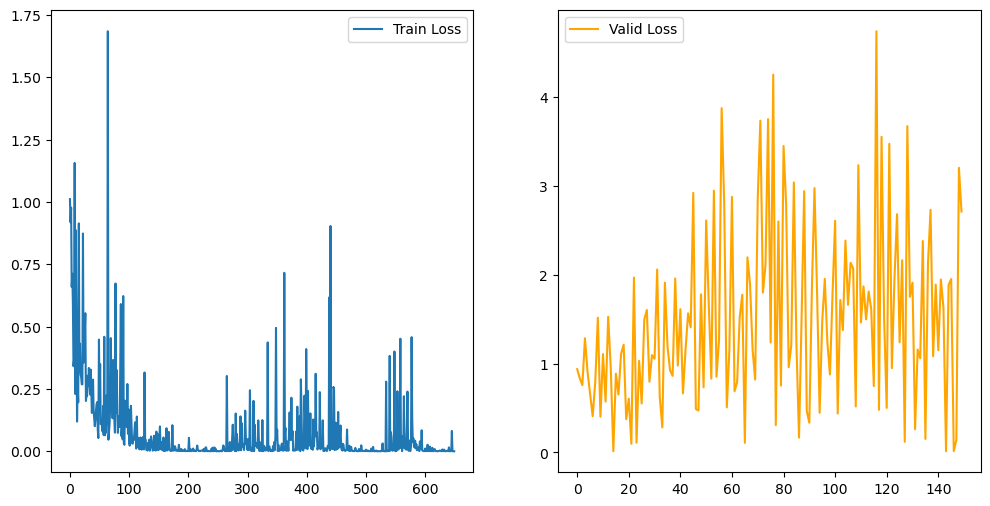

In [6]:
tl = np.asarray(train_losses).ravel()
vl = np.asarray(valid_losses).ravel()
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(tl)
plt.legend(['Train Loss'])
plt.subplot(1,2,2)
plt.plot(vl,'orange')
plt.legend(['Valid Loss'])
plt.show()